<p style="text-align: center;"> <b>Using python to modelize a System </b> </p>

<p style="text-align: center;"> <b>
Meetup – AFPY<br>
25/01/2022
</b> </p>
<p style="text-align: center;"> <i>
Karamoko Samassa  <br>
R&D Engineer
    </i>
</p>

<div align="center"> <b>The Project</b> </div> 

 <p style="text-align: center;"> Air Conditioning System <br></p> 

<div align="center"><img src="images/system.png" width="750" height="350" /></div> 

<div align="center"> <b>Current state of my project</b></div>

<div align="center"> Layer2       &nbsp;       Layer1</div>
<div align="center"><img src="T_time.gif" width="700" height="350" /> 

# Basics
- Numpy
- Sympy
- Matplotlib
- SciPy

# Numpy

>Fundamental package for scientific computing in Python
Core of the package : ndarray object
>- NumPy arrays have a fixed size at creation, unlike Python lists 
>- The elements in a NumPy array are all required to be of the same data type
>- NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data

In [7]:
import numpy as np

data = np.array([[1,2],[3,4],[5,6]], dtype="int32")
(data.shape,
type(data))

((3, 2), numpy.ndarray)

## Order of array data in Memory

Many common operations on arrays, such as the transpose can be implemented by simply changing the `strides` attribute,   
which can eliminate the need for moving data around in the memory. Operations that only require changing the strides atribute  
result in new `ndarray` objects that refer to the same data as original array. Such arrays are called `views`  
*for efficiency Numpy strives to create views rather than copies of arrays when applying operation on arrays*

In [14]:
data_F = np.array([[1,2,3],[3,4,5]], dtype="int32", order="F") # Fortran
data_F.strides

(4, 8)

In [15]:
data_C = np.array([[1,2,3],[3,4,5]], dtype="int32", order="C") # C
data_C.strides

(12, 4)

### Take care when copying array data

In [16]:
import copy
data_1 = copy.deepcopy(data_C[:,0])
data_2 = data_C[:,0]
data_2[:] = 0
np.shares_memory(data_1, data_C), np.shares_memory(data_2, data_C)

(False, True)

In [17]:
data_C

array([[0, 2, 3],
       [0, 4, 5]], dtype=int32)

## Define a new function which operates on Numpy arrays

In [18]:
# Don't do this
def heavside(x):
    return 1 if x > 0 else 0

# This function doesn't work on 
x = np.linspace(-5, 5, 11)
# heavside(x)


**Broadcasting an important functionality in numpy**

In [19]:
# Use Boolean-valued arrays instead
# Broadcasting

def heavside(x):
    return 1.0*(x > 0)

heavside(x)

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

#  Symbolic Computing with Sympy

## SymPy 
>- A Python library for symbolic mathematics.  
It provides functionality for algebraic operations such as manipulation of equations,calculus, and solving equations symbolically  
>-It can be easily integrated in Python Libraries

In [11]:
from sympy import Symbol, diff, Derivative, Function, Eq
x = Symbol('x')
y = Symbol('y')
expr = x + 2*y
expr_1 = expr.subs(x, 1)
expr

x + 2*y

In [12]:
expr_1

2*y + 1

In [25]:
xn1 = Symbol('x_n-1')
xn = Symbol('x_n')
x = Symbol('x')
u = Function("u")
f = Function("f")
a = Symbol('alpha')
Eq(Derivative(u(xn), x),  ((u(xn) - u(xn1))/(x - xn1)))

d = Symbol('Delta')
dd = Symbol('delta')
t = Symbol('t')
Eq(-d*u(x),f(x))

# sympy.latex()


TypeError: unsupported operand type(s) for *: 'Symbol' and 'UndefinedFunction'

## Equation solving

In [47]:
from sympy import symbols, Eq, solve
x, y = symbols('x y')
eq1 = Eq(x + y, 2)
eq2 = Eq(x - y, 1)
sol = solve((eq1, eq2), (x, y))
print(sol)

{x: 3/2, y: 1/2}


## Rectangular Systems

A(m,n) and m != n, in such system, the solution must be given in terms of the remaining free variables.     
This makes it difficult to treat this type of problem numerically, but a symbolic approach can often be used instead.

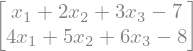

In [32]:
import sympy
sympy.init_printing()
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1,2,3],[4,5,6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])
A*x - b

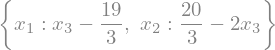

In [33]:
sympy.solve(A*x - b, x_vars)

# Plotting and Visualization 
>- Better data analysis is done through visualization  
>- Visualization is postprocess most important step in general
>- Matplotlib it's learning curve is shallow  and support wide range of usage
It has an OO API

### Let's create a simple graph of (y=x)

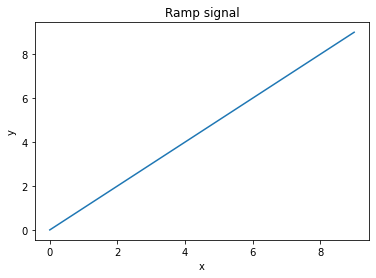

In [6]:
import numpy as np
import matplotlib.pyplot as plt

start = 0  
stop = 10  
step = 1  
x = np.arange(start, stop, step)  
y = x  

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ramp signal')
plt.show()


## Surface plot with matplotlib

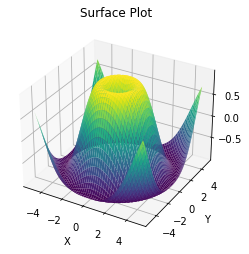

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and a title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Surface Plot')

plt.show()


>- `np.meshgrid`: takes two 1-D arrays as input, and returns two 2-D arrays representing the grid coordinates of the rectangular grid.  
> - It differs from Matlab grid: first dimension varying along rows and the second dimension varying along columns. It's inverse here

# SciPy
>- Built on top of Numpy
>- Powerful library supporting linear algebra, signal processing, …
>- Working env similar to Matlab

# SciPy Library supports

>- Special functions (scipy.special)
>- Integration (scipy.integrate)
>- Optimization (scipy.optimize)
>- Interpolation (scipy.interpolate)
>- Fourier Transforms (scipy.fft)
>- Signal Processing (scipy.signal)
>- Linear Algebra (scipy.linalg)
>- Sparse eigenvalue problems with ARPACK
>- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
>- Spatial data structures and algorithms (scipy.spatial)
>- Statistics (scipy.stats)
>- Multidimensional image processing (scipy.ndimage)


## Example of Linear Algebra with SciPy

In [18]:
import numpy as np
from scipy import linalg as lg

# Define the system of equations
A = np.array([[3, 2, -1], [2, -2, 4], [-1, 0.5, -1]])
b = np.array([1, -2, 0])

# Solve the system of equations
x = lg.solve(A, b)

print(x)


[ 1. -2. -2.]


## Signal Processing with SciPy

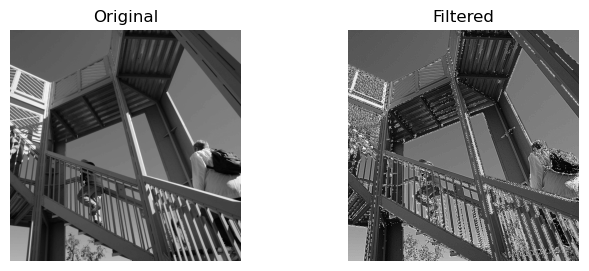

In [13]:
from scipy import ndimage
import scipy
import matplotlib.pyplot as plt

# Load an image
image = scipy.datasets.ascent()

# Define the filter
filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the filter to the image
filtered_image = ndimage.convolve(image, filter)

# Plot the original and filtered images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True)
ax1.imshow(image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(filtered_image, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Filtered')

plt.show()


**To get more about documentation or source code**

In [40]:
import inspect
import scipy
inspect.getsource(scipy.sparse)
np.info(scipy.sparse)

Sparse matrices (:mod:`scipy.sparse`)

.. currentmodule:: scipy.sparse

SciPy 2-D sparse array package for numeric data.

.. note::

   This package is switching to an array interface, compatible with
   NumPy arrays, from the older matrix interface.  We recommend that
   you use the array objects (`bsr_array`, `coo_array`, etc.) for
   all new work.

   When using the array interface, please note that:

   - ``x * y`` no longer performs matrix multiplication, but
     element-wise multiplication (just like with NumPy arrays).  To
     make code work with both arrays and matrices, use ``x @ y`` for
     matrix multiplication.
   - Operations such as `sum`, that used to produce dense matrices, now
     produce arrays, whose multiplication behavior differs similarly.
   - Sparse arrays currently must be two-dimensional.  This also means
     that all *slicing* operations on these objects must produce
     two-dimensional results, or they will result in an error. This
     will be address

# Intermediate
>- Optimization
>- Interpolation
>- Sparse Matrix
>- Partial Differential Equations

# Optimization
>- Find and select the optimal element from a set of feasible candidates
>- As in maths optimization means find an extreme value
>- It’s very close to equation solving

## Nonlinear Least  Square Problems  

Newton's method or a quasi-Newton method could be used to solve nonlinear problem.  
In Scipy, the function `optimize.leastsq` provides a nonlinear solver least square solver that uses the  
*Luvenberg_Marquardt* method. Which is based on the idea of successive linearizations of the problem in each iteration.

Text(0, 0.5, '$f(x, \\beta)$')

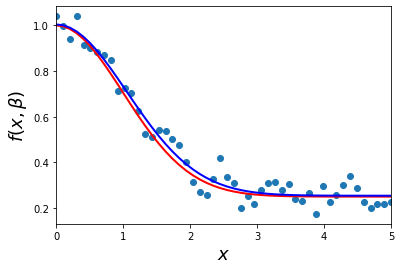

In [42]:
from scipy import linalg as la
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt


beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1*np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05*np.random.randn(len(xdata))

def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xddata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZEAAAEOCAYAAABIESrBAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAAsTAAALEwEAmpwYAAAygUlEQVR4nO3dd3hVVfb/8fdKCJDQIhApoY+AoKgI2LBiAUQd7KIyFhSxouOg8Bu7ozB2Z1D5omNXrIijKOgIimKnSFFRmkhClwCBEFL274+dhBDSuCQ5Jzef1/Pc57ZzTxY34a6729rmnENERCQSMUEHICIi1ZeSiIiIRExJREREIqYkIiIiEVMSERGRiNUKOoDK1rRpU9euXbugwxARqVZmzZq13jmXVNZxUZ9E2rVrx/fffx90GCIi1YqZ/Vae49SdJSIiEVMSERGRiCmJiIhIxJREREQkYkoiIiISsahPIvNTNtF7zDQmzUnZ63NNmpNC7zHTaD9ycoWdU0SkOov6Kb4AKWkZjJo4H4CB3ZMjOsekOSmMmjifjKycCjuniEh1F/UtkXwZWTk8OHVRxK9/cOqiggRSUecUEanuakwSAUhNy6jw1+7NOUVEqrsalURaJsZX+Gv35pwiItVdjUki8XGxjOjbOeLXj+jbmfi42Ao9p4hIdVcjBtaTE+MZ0bfzXg2A57/2wamLSE3LoGUFnFNEpLqzaN9jvWfPnk4FGEVE9oyZzXLO9SzruBrTnSUiIhUvNEnEzJ41s7VmtqCE583M/mVmi81snpkdWtUxiojIrsI0JvI8MBZ4sYTn+wMd8y6HA0/lXZcqJQXGj4c2bXZe/vdrisY2REQqQGiSiHNuhpm1K+WQPwMvOj+I87WZJZpZC+fcqtLOu3o1XHXVro/F1E0itmF9au+7ha37r2LkZt/4USIREdkzoUki5ZAM/F7o/sq8x3ZLImY2FBgK0IIW9ONZVtCm4JK5vS6522uTtbYRWxe0YkPdHQz7ZB2J/4RjjoHY2KJnFBGR4lSnJGLFPFbs1DLn3HhgPEDPVq3cs6d9C8teh2XLyFy8jE1uH36jLR9xChMYxMLtB7Lm22ROOAFatoTzzoMrr4SuXSvznyMiUv1VpySyEmhd6H4rILXMVzVvDuPGFdw96f6PyV6ZQtu0VZz86zfMWNiblIw2TGAQrzGIZanteewx+Ne/HEOHGvfcA0llblUvIlIzhWZ2Vjn8F/hL3iytI4BNZY2HFOfm/l1Ja9Kcr9scxL0nXskR17zAM2efwfCjPmYJf+IrjuBKxmO5OYwbB/vtBw89BJmZFf8PEhGp7kKTRMxsAvAV0NnMVprZEDMbZmbD8g75AFgKLAaeBq6J5OcM7J7M6LO6kZwYjwFJTRtywt+vodnM6diK3zjingGMb/0P5nEQ/fmAzZthxAg44ACYNAmifG2miMge0Yr14mzbBvfeCw89xIfZJ3Fzrcf5KbsTAMcfD088ofESEYluWrG+NxISYPRomDWL/odv5IfsAxjLtTSO28ynn0KvXvDKK0EHKSISPCWR0hx0EMycSdzYx7i2wUsszmrL4Fqvsm0bXHwxXHedxkpEpGZTEilLbCxcey389BP7nHkCL2RfxDiuonZsNk88AccdB7//XvZpRESikZJIeSUnw8SJ2LhxXBX7H77IOZI2Cev45hvo3h0+/jjoAEVEqp6SyJ666iqYPJleDRYxe9v+9G30NRs2QN++cN99kJsbdIAiIlVHSaSISXNS6D1mGu1HTqb3mGlMmpOy+0F9+8KXX9KkTX0mb+rNnY0eAxy33QaDB0NWVlVHLSISDCWRQibNSWHUxPmkpGXggJS0DEZNnF98IjnwQPjmG2J79eCuTTcxOf5c6sdn8+qrcP75GnAXkZpBSaSQB6cuIiMrZ5fHMrJyeHDqouJf0Lw5fPopnH02/be9zcc7jicxYQfvvAMDB0JGRqWHLCISKCWRQlLTiv/UL+lxwK8peeMNGDGCI3JmMm37UTRtmMmUKTBgAKSnV1KwIiIhoCRSSMvE+D16vEBMDDzwAIwaRffcWXyWcRgtGmcyfTqccgqkpVV8rCIiYaAkUsiIvp2Jj9t1M5H4uFhG9O1cvhPcdx9cfz1ds+YxY1tP2jTbzldfwYknwvr1lRCwiEjAlEQKKVqcMTkxntFndSvXjoeT5qTQ+5/T6RB/MpN79GW/7QuYsbUnf2q1ndmzfc2ttWsr/Z8gIlKlqtN+IlViYPfkPd4mN39WV0ZWDlgMN/S5hthtW+n30xfMiOvJSR1msXBhHQYMgOnToX79SgpeRKSKqSVSAYrO6sqJieX6ATfzZefDablxIdO3Hkb71ll8/z2ce67WkYhI9FASqQDFzd7Kio3j8gG3sL7HETRbM4/nNh5L7Xg/a+vKK7UviYhEByWRClDS7K26DevTt88I5rboxHHpX/NMwsVYXDYvvAC33VbFQYqIVAIlkQpQ0qwuM9gQU4fLz7mTlQ33ZfCGtxjZ8g6IyeX++2Hs2IACFhGpIEoiFaCkWV1p2/zgxx8Jjbjy7NvYFleH+38bzcBOLwBwww3w9tsBBi4ispe0PW4l6j1mGimFxkv6//wFT707hhyLYcxffua2FzpitXJodt43dOi2nRF9O+/xzDARkcqg7XFDoGg314f7H82TRw8i1uXyt7d70frAH3HZsax9uxfLl8aUXOxRRCSklEQqUXHdXC0f+ycMHEid9E18nNKfBh1SyM2MY93EHmxNt5KLPYqIhJAWG1ayYhcvvvgiizocSOf1K3gl8SLObvJfsjY0ZP3kg4k5cxbgFzA+OHURqWkZtEyMV1eXiISSWiJBaNCA2y67j411G3D6ss/4f63+jtXJIuPX5uTO6bJn+5qIiARISSQgFw06gZvO/n9kWwx3/TCWUw6dADhW/q89ox5fv2f7moiIBERJJCADuycz8ObBPNl/KABvzL2OSwavxDlj0YSuZP1Rb7fXlLqviYhIAJREAjSwezI3vP8kDBhAw4wtPLdkEGedmYvb4QfaczN3HbIqc18TEZEqpiQSNDN4/nlo2RL7cibP/+kftO6QRdaGBqyffHBBja3C+5pMmpNC7zHTaD9yMr3HTNNYiYgERkkkDJo2hVdfhZgYGjx8F5/c8R0J9XPJ+LU5m7/cb5d9TTToLiJhoiQSFscdB7ffDs7RceTZvDluE2awaWZn7unVp2B6b9Gy86BBdxEJjpJImNx+u08mq1dz6kuDuON2h3Nw0UWwZo0/pKTBdQ26i0gQlETCJDYWXnkFmjSBqVO5PeFhjj/eJ5DBgyE3t+TBdQ26i0gQlETCJjkZXvBVfmNvG8UrN8+maVP4+GP45z9LLjufP+guIlKVlETCaMAAuOkmyM6m5fVn89L/bQV8b1fTrcWXnVdJFBEJgkrBh9WOHXDkkTB7NgwZwq1NnuGBB6BVK5g71/d4iYhUFpWCr+5q14aXXoI6deA//+EfR07miCNg5Uq47DLt0S4i4aAkEmZdu8L99wMQN2wIrz35B4mJ8N578PjjwYYmIgJKIuF3441w7LGwZg1t77+KZ//jmyC33ALVsZdORKJLqJKImfUzs0VmttjMRhbzfCMze8/MfjCzhWZ2WRBxVqmYGF8WpX59eOstztw+geuvh6wsOP982LIl6ABFpCYLTRIxs1jgCaA/0BUYZGZdixx2LfCjc+5g4HjgYTOrXaWBBqF9e3j0UX/72mt58MYUDj4Yli71k7hERIISmiQCHAYsds4tdc7tAF4D/lzkGAc0MDMD6gN/ANlVG2ZAhgzxU3/T0qhzzRBeednlj7nzzjtBByciNVWYkkgy8Huh+yvzHitsLNAFSAXmA8Odc7lFT2RmQ83sezP7ft26dZUVb9Uyg6efhsaNYepUDvji/3jgAf/UFVdAamqw4YlIzRSmJGLFPFZ0ImtfYC7QEjgEGGtmDXd7kXPjnXM9nXM9k5KSKjrO4LRoAePG+ds338x1/RbTty/88Yef9pu7WzoVEalcYUoiK4HWhe63wrc4CrsMmOi8xcAyYP8qii8czj0XBg2CbduIufxSnn06hyZN4KOPYOzYoIMTkZomTEnkO6CjmbXPGyy/APhvkWNWACcCmFkzoDOwtEqjDIOxY32rZOZMWk4cy/jx/uFbboGFC4MNTURqltAkEedcNnAdMBX4CXjDObfQzIaZ2bC8w+4FjjKz+cAnwK3OufXBRBygxo13dmuNGsVZBy/h8sshM9OXjc/MDDY8Eak5VDurOrvoIr8j4gknkD7pfxxyaAxLlsCIERQMuouIREK1s2qCxx+HpCSYPp36r47n5Zf9liQPPQTTpwcdnIjUBEoi1VnTpvDEE/72iBEc0XIFt93mizNecgls2hRseCIS/ZREqrtzzoGzzoL0dBg6lNv+7ujVC37/HYYPDzo4EYl2SiLVnZlvjeQtQqz18vO8+CLUres3SJw0KegARSSaKYlEg+bNd9aGv+km9m+Yypgx/u7QobB2bXChiUh0UxKJFhdd5GtrbdoEw4Zx/XWOE06Adetg2DBtYiUilUNJJFqY+bUjDRvCe+8R8/oEnnsOGjTwBRpffjnoAEUkGimJRJNWreCRR/ztG26gbcK6gl6u667zg+0iIhVJSSTaXH459OkDGzbAjTdy6aVwxhmweTOcds52jrp/Gu1HTqb3mGlMmpMSdLQiUs0piUSb/JLx8fHw6qvYB5MZPx4aJuYw79u6/Dx9XxyQkpbBqInzlUhEZK8oiUSjDh3gH//wt4cNo1n8ZloM+BGAtE+7kPVHPQAysnJ4cOqioKIUkSigJBJlJs1JofeYafxp9X782KozrFwJI0eS2WoF9Q5YicuOZf3kg3G5fvuW1LSMgCMWkepMSSSKTJqTwqiJ80lJyyAnJpa/nnwdWTGx8NRT9N/4K41PWkhs/Qx2pO7D5m87ANAyMT7gqEWkOlMSiSIPTl1ERlZOwf2f923Pk0ecC8A/p/6bfeIzaXLqPADSPu+E/dGIEX07F7ReNOAuIntKSSSKFNc19cSR5/Nrk9Y0+G0pb6z5mP26b6XBIb9Bbgx8dhhZWRS0XjTgLiJ7KqIkYmadzOxMM7vKzIbm3e5Y0cHJnimua2pHrTgeOncEmNH5xaeY2a8xqZ+3pUMHWP5Lbf46cscurRfQgLuIlF+5k4iZdTGzx80sFb/z4FvAU8C4vNs/m1mqmT1mZl0qJ1wpzYi+nYmPi93lsfi4WPoPPcuvNszJgSFDqF83m+ef97OBV37alszURrudSwPuIlIeZSYRM/uTmb0FLACGAD8AdwN/AU4FBuTdvifvuSuABWb2ppl1qKzAZXcDuycz+qxuJCfGY0ByYjyjz+rGwO7JcP/90KYNzJ4NDz/MMcfAX/8KuBjWTz6E3Kxd/xQ04C4i5VHm9rhmlgnMBx4HJjrntpZxfD3gHOAG4ADnXN0KijUiUb097p6aMgX69/d14n/4ge1tOtGxaxYrl8XRoOdSGp/4E+BbLwXJR0RqpIrcHvc851xP59xLZSUQAOfcVufcC865HsD55QlWqki/fvCXv8D27XDlldStncs7b8QRE+vYMqs9mSsa79p6EREpQ5lJxDn3bqQn35vXSiV55BHYd1+YMQPGj6dnT7jt7wbOqPvVkUy5to8SiIiUW7kG1s2snZkNMrOBZtammOdji3udhFCTJjB2rL99yy3w++/cdht07w7Ll8PNNwcanYhUM+UZWD8TWAS8DEwElpnZV2Z2RN7zzwHbzSzFzEbnjYlImJ1zDgwcCFu2wNVXE1fL8dJLUKeOr934/vtBBygi1UV5WiJ3AL8DA/GzsR4BOgKfmtkjwCXAdPy03xF5j9evlGilYuTvy96oEUyeDBMmcMABcN99/ukrroD164MNUUSqh/Ikkf2Bx5xz7znnpjjnRgCHAKnAcGCqc+4U59xJwLF5x19dWQFLBWnZEh5+2N++4QZYt46bboLjjoM1a7SlroiUT3mSyA6gVuEHnHMrgTvz7r5b6PEvgeeACyoqQKlEl18OJ57oN7AaPpyYGHj+eahfH95+G155JegARSTsypNEvgWGmFntIo9/DRiwosjj84B2ex+aVDozGD8eEhJgwgR47z3atUNb6opIuZUnidyL76Kak1crqyOAc+5XfLKYWeT4ZkBCRQYplahDh52DIVdfDZs2cdllfkvdTZvgsssgNzfYEEUkvMqzTmQGcDo+MTyFr5G1ycw+A24ETjezruZ1AK4FfqzEmKWiXX89HH44pKTAiBEFDZSmTeGTT/wYvIhIccq1TsQ5NwXogB84HwV8AOyLL23yIr4syhZ8fa1mwE9mdrim+1YTsbHw7LNQu7af4/vRRzRr5hMJ+OUkP/8cbIgiEk7lruLrvC+ccw845wY557oADYCj8K2Pl/HJZDtwIfAlsMnMlpjZO5UQu1Skrl3h7rv97SuvhM2bOfNMuOQSXyVl8GDIygo2RBEJn73alMo5l+Gc+9o5N845N8w5dzg+sRwIDMavKVkG9N77UKXS/e1v0LMnrFjhmx/AyZenUjtxO99/Dx36LdNmVSKyizKr+FZ3quK7hxYsgB49YMcOZj41gStSEtm4pBFrJhwBBm0Gf8PjN7ZWfS2RKFeRVXylJjnwQLjTLwHqMOpGYtK3ULfNHzQ8Ygk4I2XSQYx+d3HAQYpIWCiJyO5uuQV69KBF2hpGfvY8AIlH/0LtZpvI2ZzAwrf+FGx8IhIaSiKyu1q14LnnyIqtxeA5H3Dkbz9gsY6mp8/BauWwdWErJkwIOkgRCQMlESlet278etVNADzw4b9I2JFBXJOt7Huyn+t79dXw229BBigiYVDhScTMcsxshZn9JYLX9jOzRWa22MxGlnDM8WY218wW5i14lErS9bH7SNv/QFpv8t1ayYnxPPWPxILV7IMHQ05O0FGKSJAqoyXyOxAPPG9ms8v7oryNrZ4A+gNdgUFm1rXIMYnAk8AZzrkDgHMrKmgpRlwcia+/ArVq8ZfZk5nZy3Hmock88ww0bw6ffw4PPBB0kCISpApPIs65ds65JHy5+Ff34KWHAYudc0udczuA14A/FznmQmCic25F3s9aWwEhS2kOOgjuuMPfvvRSSEsjKclX+wX/1HffBRWciASt0sZEnHPznHMP7cFLkvGtmHwr8x4rrBOwj5l9amazSuoyM7OhZva9mX2/bt26PQtcdjdqlK+ttXKlL+0L9O0Lw4dDdjZcdJHfJFFEap49TiJmdl5lBIIvK19U0ZWQtYAewACgL3C7mXXa7UXOjXfO9XTO9UxKSqr4SGuaWrXgxRchPt5vMvLmmwCMGQPdusGvv/qB9ihftyoixYikJfKqmV1V4ZH4lkfrQvdb4XdPLHrMFOfcVufcemAGcHAlxCJFdeoED+U1LIcNg1WrqFsXXn/db0fyyis7u7hEpOaIJIk8DzxpZn8v7kkzO9LMPo/gvN8BHc2sfd4GWBcA/y1yzLvAMWZWy8wSgMPxe7tLVbj6at+P9ccffldE5+jSZWep+Ouugx+1CYBIjbLHScQ5dwXwAHCvmT2a/7iZdTazicAXQPcIzpsNXAdMxSeGN5xzC81smJkNyzvmJ2AKfvfEb4FnnHML9vRnSYTMfMn4xo1hyhQYNw7wlX4HD4Zt2+D88/21iNQMERdgNLMbgYeBCUA6cDl+DOM/wD3OudUVFONeUQHGSvDGGz5bJCTA3LnQsSPp6b5u4y+/+Ery+XuRiEj1VBUFGJ8GpuGn3V4JvAl0cc5dE5YEIpXkvPPgwgt9k2PwYMjOpn59n1vq1PH7WqksikjNEMnsrDgzGw4sAfoAs/EtkDh2naIr0WzsWEhOhm++8dO0gIMPhsce808PHQqLVexXJOpF0hL5Fb/Z1Dr8yvGe+NbIGcAHZla/AuOTsNpnn53Tse66C77+GoCrroJzzoH0dN/jlZkZWIQiUgUiSSKx+O6rg51zkwGcc2/gk8gRwHQza1pxIUponXQS3HSTL6A1aBCkpWHmu7Pat4fZs/1miSISvSJJIh2dc88653ILP+ic+wg4CWiP319daoLRo/2I+vLlvg/LORIT/fqRuDjf6/VqkeI3k+ak0HvMNNqPnEzvMdO05a5INRbJFN/tpTz3DXAMUHdvgpJqpE4deO01qF/fr2R/+mkAevXaOT5yxRUwb56/PWlOCqMmziclLQMHpKRlMGri/IJEogQjUr1URgHGn4DeFX1eCbH99oP/+z9/e/hwWLgQ8GsTL7kEMjLgrLNg40Z4cOoiMrJ2rR+fkZXDg1MXlZlgRCR8ykwiZnbinp7UOfd73mtPiiQoqYYuvBAuuwy2by9YcWgGTz0F3bvDkiVw8cWQsjGj2JenpmWUmmBEJJzK0xKZYmbTzOy0vD0/SpU3BfjMvA2jPtj7ECWsinY9vXfFKOjc2bdEbvK7IsbHw9tv+0XuH3wAubO6FHuulonxpKaVnGBEJJzKk0QOAbLxdaxWmdkrZjY8L6kcZWa9zex0M/urmb0BrALeBrblvVaiUHFdT7d8uIRpd//bj5OMH19Q7bd9e7/40AxWTmtPzvLmu5wrPi6WEX070zIxvtifVdLjIhK88iSRc4Gh+HGOqcDpwKP4Yoif4yvpTgIeAk7BJ5vDnXP9nXMqxxelSup6un1ZLDz8sH/gyith2TIATjkF7r0XnDM2ftCdJjmNMSA5MZ7RZ3VjYPdkRvTtTHzcro3d/AQjIuFUqxzH3AH84px7FfjKzM4BVuC3sE3Cr1ZfBywA5hSd+ivRqdSup1uvIfXt92g5fSo/9O7L8Gv+xY0DujFqVDLffQfvvhtD9kdHsvArX34r38Dufg+yB6cuIjUtg5aJ8Yzo27ngcREJn/IkkY1Aof/qvA4Mds49XykRSbXQMjGelGISScvEeCbNTWXMoUN4a9YcDl71K0PfepxRmcMBeOGFZA47zE/5vfzynd1c+QZ2T1bSEKlGytOdtQAYYmb5/7OL24FQapjSup4enLqI1bUSuOrM/8f2WrW58IcpnPH9Bzw4dRGNGsHEiX5Zyeuv+4op5aH1IyLhVJ4kcjdwKLDCzH7Gd1+damb9zaxZpUYnoTWwezKjz+pGcmL8bmMb+V1dC5vvx99PuRaAez5+iqQf5wJwwAE+gcTEwD33+F0RS6P1IyLhVa79RPL2Mb8CP7h+ZN7D+S9cg6/kOyf/2jm3vMIjjZD2E6l6vcdM26Wr6+6Pn+KS2ZNZ0yiJZr8sgH33BeBf//JrE2vXhmnToHcJS1SLni9fcmI8M0f2qZR/g0hNV6H7iTjnfnHO3eKcy/9vPgI4BxiNTx6HAn8H3gKWmNn6yMKWaFC0q+sffa5gdquuNNu0zi9EzM4G4Prr4ZprYMcOOPPMgolcu9H6EZHwiqTsyT3A5865d5xztznnBjjnWgLJ+Eq+d+On/UoNVbSra98mDVn7nxeheXP49FO49VbAD6g//rjftn3dOjjtNNi0affzaf2ISHhFvD1udaHurBD54gs44QTfEpkwAS64APCJ46ij4Mcf/XqSyZOhVqF5g/ljIoXXpcTHxRaMwYhIxauK7XFF9szRR8Ojj/rbQ4bA/PkANGoE778PSUnw0Udwww1Q+LtNaYP4oJlbIkFSS0SqlnNw6aXw4ovQtq3fEbG5L4Py5ZfQp4/fDfHBB8u3oZVaKSKVQy0RCSczGDcODj8cfvsNzjgDtm0DfJfWc8/5w0aM2Ln7bmlU+VckWEoiUvXi4+Hdd6FdO/juO7joIr/FLn6X3cKbWb37bumn0swtkWApiUgwmjXzteETE2HSJN/0yDN8ONx+u88r55/vJ3SVRDO3RIKlJCLB6dIF3nnHb8b+6KN+Q/Y8d9/td0bMzPQ9XrNmFX8KVf4VCZaSiATr+OPhmWf87eHD/TQt/NDJv//tWyJbtkC/frComGGOsmZuiUjl0uwsCYe77vLNj4QE+PxzOPRQwK9mP+MMmDoV2rTxS01atw42VJGaQLOzpHq5804YPNjP1DrtNFixAvB1td5+G4480j90yil+dbuIhIOSiISDGTz9NBx3HKxaBSedBKtXA1Cvnu/lOvBA+Plnv+h9zZqA4xURQElEwqROHT/Qfsgh8OuvPpGs97U8GzeGjz+Grl1h4UI/lLJqVaDRighKIhI2++zja5906eKzRd++kJYG+IXt06dDt26+RXLccbByZbDhitR0SiISPklJ8Mkn8Kc/wezZcOqpkJ4O+K1Ipk3b2Vg57riC4RMRCYCSiIRTixY+kbRpA1995adoZfhV6E2b+qd69IClS30iWb482HDLoiKREq2URCS82rb12aJFC9+PdfbZfvUhfozkf//zJbiWL4djj4UlS4INtyTa3leimZKIhNt++/ls0bQpfPihL66VlQX4iikffeS31f39d59I8qrLh4qKREo0UxKR8Ova1WeLxEQ/e+vsswu6tho2hClTfJdWaqrfsuSTT4INtygViZRoFqokYmb9zGyRmS02s5GlHNfLzHLM7JyqjE8C1L27TySNG8N770H//gV76dav7xPJeefB5s2+RMoLL/iXhWEsQkUiJZqFJomYWSzwBNAf6AoMMrOuJRz3T2Bq1UYogevVC2bMgJYt4bPP/KrDtWsBqFvX77j7t7/53XcvvRQGXb2ZkW8HPxahIpESzUKTRIDDgMXOuaXOuR3Aa8CfiznueuBtYG1VBichccABMHOmHyuZMweOOaZgjm9MjN8RcexYf/u1cQ1Z+d8DcDlW8PIgxiJUJFKiWa2gAygkGfi90P2VwOGFDzCzZOBMoA/Qq6QTmdlQYChAmzZtKjxQCVi7dr4SY9++8MMPfmQ9f4EicO21vkjjwLNz2Dq/NTlb6pI0cDYxdbKBYMYiBnZPVtKQqBSmlogV81jREsOPAbc653KKOXbni5wb75zr6ZzrmZSUVFHxSZg0a+Z3qzr6aL9s/ZhjoFC15jPOgAOHziYmIZPty5NY/cqRZG1MADQWIVKRwpREVgKFi3y3AlKLHNMTeM3MlgPnAE+a2cAqiU7CJzHR14g/9VTYsMGPkRTaT/eeK1rS7rKvqdU4nax1DVn1/NFkL22hsQiRChSmJPId0NHM2ptZbeAC4L+FD3DOtXfOtXPOtQPeAq5xzk2q8kglPBIS/Pa6F1/sS6MMHAj33gu5uQzsnszDQ/bj0OtnkdBpFW5HHClvHspXryWTnR104CLRITRJxDmXDVyHn3X1E/CGc26hmQ0zs2HBRiehFhcHL74Io0f7kvJ33OHn+6anM7B7Mt/cdRzpP7fgoYcgNhYeeABOPrmg0ryI7AXtbCjRZfJkuPBCv2DkoIN8K6V9+4KnZ8zwW+6uXu2rqbzxhh9WEZFdaWdDqZkGDIBvvoFOnWDePL+2ZPr0gqePPdYXBj7mGL8fyfHH+2nBOaVO1RCRkiiJSPTZf3+fSPr39wPuJ58Mjz8Oea3u/ALBf/ubTx633OLLpvz6a8Bxi1RDSiISnRITfXmUW2/1meLGG+H00wv21Y2L8y2Q99/3SWXmTDj4YPj3vyE3N9DIRaoVJRGJXrGxMGYMvPmm3zFx8mS/LeJ77xUcMmAALFjgJ3dlZMANN0CfPn6fEhEpm5KIRL9zzvHjIyeeCOvW+ZWIV10FW7cCvqbjSy/BxIl+58TPPvNj8uPGFfSAiUgJlESkZmjVypdGeeQRqF0bxo/3lYG//bbgkDPP9Nu6n3++zy9XX+0H4ufMCTBuiSphqCpd0ZREpOaIiYGbboLvvoMDD/Qj6Ucd5deVFNp697XX/NTfpCRfoqtHDxg61DdiKkM0frDI7qJ1h0slEal5DjrIJ5KbbvKD7vfe66sDv/9+wSHnngu//OIPiY2Fp5+Gjh3h0UcLNlasENH6wSK7i9YdLpVEpGaqW9d3bc2Y4Qfbly3zs7dOP71gVD0x0R8yb54vGLxpE/z1rz4HTZmy+ykjaVFE6weL7C5ad7hUEpGa7Zhj/OrDxx6DBg18a6RrV7jrroIuri5d/Pbu773ntzH5+We/BOWEE3whYYi8RRGtHyyyu2jd4VJJRKRWLRg+HBYt8nN9MzPh7rt9F9ebb0JuLmZw2ml+OvADD0CjRj6BnHCCX6h425Nr2bZjz1sU0frBIruL1h0ulUSkxtqt+2l1rp/r+9lnO7u4zjvPz+J65x1wjjp1YMQIWL7c55nERN8jtvCZ7qx59UgyljXdZVpwWS2KaPhg0cSA8onWHS5VgFFqpPzup8LjEfFxsTv/U2dnwzPPwH33+U2vAA45xGeO00/31YLxdR7//W+4674ssjPiAKjdciMNey4jodNqWjWpy8yRfcqM5cGpi0hNy6BlYjwj+nYu+GAp7bmqVFIcZb6PUm2VtwCjkojUSL3HTCOlmFZCcmL8rh/627f7ZDJ6NKTm7ZHWo4dPJqeeWpBMJnyRyvA7trDh6/bkZtQGILb+ds4etINH7mxIcgSfp2H5gC4tjgenLirf+1jCecOQIKV4quIrUopyD2jXrQvXXQeLF/vB9+bNYdYsP0By4IHw5JOwZQuDjm7J+Ifr0+vWr2h88gLi900nJ70ubzzdkLZt/ZTh6dP3bAV8WGZulRZHpBMDonlqc03r3lMSkRppjwe04+P94PuSJfDww75q448/wrXXQnIy3HADA+O38PWdx7HhowPZuro+n37qk4cZvPWWr8nVtatflrJ4cdkxhmXmVmlxRDoxICwJEir2Qz+ak2NJlESkRop4QDshwS8W+e03eP11P0V4yxY/MNKliy87P2kSlrWD447zK99/+83PGG7Rwk8PvuMOv3CxVy+/DiWlhM+XsMzcKi2OSN/HsCTIiv7QD1NyrCpKIlIj7fVMmbg4P3NrxgyYOxeuvNK3Vv73P1+Eq0ULXytl+nRaNsvhzjt9MvngAxg8GOrXh++/h5tvhtat/eZYTzzhJ4TlC8vMrdLiiPR9DEuCrOgP/b1JjtW1G0wD6yIVZeNGeO45ePZZX8kxX4sWPuEMGgSHHQZmZGT4yvQTJvjrzMydh3fu7Mfs+/eHtIYpPDY9+MHnih4ED8ukgfYjJ1PcJ6ABy8YM2OPzlXvCRhFheT8K0+ysPEoiEogFC3yGeO21XTcnadvWZ4h+/fxKxQYN2LQJ3n3Xr4j/6CM/bThfQoIfSznpJL8X/MEH+7WRlaEyZkuFffpypB/6JYk0GVR0HBVBSSSPkogEyjlf7HHCBD+GsmrVzufi4nxm6NfPX7p1Iyvb+OorX2blww/hhx92PV29enDEEf5lRx8Nhx/uq7Xsrcr4JhzGb9dFVda/e0+TY0W3iCqCkkgeJRGJRKV8S87N9dODp0zxl6+/3nUv3qQkX5o+/9KjByl/xDN1Knz+uS9LX3RWV0yMH88/5JBdL02b7llolfFNOIzfrosTjS2iiqAkkkdJRPZUlX2D3rjRD8TnJ5X8xYz54uJ8yZWjjoKePeGgg1jdqDNffl+bL77wSWXOHL+4vqhWrXzXV5cu0KmTH2fp1AmaNStYH7mLyvgmXNXfrsOQDCIVxlZbeZNIJfWuilRfpc3YqdD/0Pvs4xeSnHuu7/ZauhS+/NJfvvoK5s/3Oy8W2n2xeVwcZ3XpwlndusE5B5Hx90NY4A5g7poWzJ0Xw9y5vgts5Up/mTx51x/ZsKFPJh07+uGZtm2hTRtotL0pf1gaMXV2zUh7M1uqZWJ8sd+uK2MGVtEP4fypukC1SCT5MVbHJKiWiEgRZX2DrrJvvJs3+wTy5Zc+M8yb5xc7Fvd/Ni4O2reH/fYjp0NHliT2YF7OASza0pJf1u/DL8trs2iRsXFj6T8ypk4WsQ0yiK2XSe0GOzihe0OOPqgBzZv7Vsy++/o96Rs39oP+xbVq8lXlt+uq7g6qzq2e8lJLRCRCpX2DrtJvvA0b+mlZJ52087H0dD99eN48f5k/32/zm5rqt2L85RdigU55l3zZdeOJbd2aDV278Ev9Q/m1VhdW5CSzYnsSKzbvw29/1Gf5qjgyM+PIzYwjaz1sB95dAO+WEF6dOj6ZNGnirxMTfcj5lwYNkjlmRz2mL0tlU1YGTRNjufjoZNq4JH7+2U8SqFfPV5apU8fvIBmpqly8WN1bPRVNLRGRIiqr4GCl2rbNd4ctXsyCz2axYMZskjek0jx9Ay22rKf+jrI/TB2wgSb8Ht+ZNfU6sKZuW1bXasVqa8Fqty+rs5qyfkdD/shMYMO2eDKzK/Y7aFycTyj5lzp1oHbtXS9xcTtv16rlL3Fx8PFPq8jIyYIYh8U4MH9pEB/L4KPaEhtLwSUmZud10dtmu17n386/xMTA/R/8RFrGDv+O5bfEDBonxHHnGQcUHAvsdru469Jul/VcScdVxHNnnKGBdUBJRCJTUndFGKdiFlVc1079zG0czBZe6d/KD5akpsK6dbB2rb/Ov71+ffEj9UU4IIN4/qAxf9CYDTRhE43YTMPdL9aIrTEN2Gb12Wr12EY9tpLAVpfANhfPdleH7bm1cSqgETLqzhKJ2MDuycV2TVTlYHGkiuvCSa+TwJckwCmnlP5i5/xm8ps2QVrarpeNG32dsPR0LD2dhC1bSEhPp1V6un88Y6PfUjgjw5fQz7+dkwM5ZfxYIIs4tlN3l0sWceygdrGXbGoVXLKI2+U6h9hiL7nEFFwXvp1DLA4jl5jdrvNv51+K3nd5zZGS7uffLu66tNtlPVfScRX13PslPrMrJRGRPTCib+diu7rCtBPhXiU6Mz+4kZjop25VhKws2LHD13bJzNx5O/86KwvLzqZ2Vhbf/bSKFz9fTO6OLGrlZBPrcqkbA4MObcnhrRr6hJSd7a9zc0u+dm7X69xcyM3y94te8o+DXR8vfL/Q7aXrtvLN0vVk5zos77laMcbh7RvTvmm9nf/uwr08RXt8SuoBKq1nqDJ6jUo5pz1XvlMoiYjsgeowFTN0iS4uzl/q1Svz0Fu+mUZK20a7Pf5VXDwzL+sTillRHYB5xcTRPkR/AxXiufJlESURkT1UUldXWFSHRFeS0mZZBTErqqSkVdV/A1WZPPN/Vu3m+/Uoz/FKIiJRKOyJriSldcVV2SLQPGGZyluVcRQ3M7Esmg4hUoOEfc+K0vYuqeqNrMKywVSkcZT2uy7pueJ+VlnUEhGpIcLyzbo0pXXFlbRGp7JmxoVl98VI4ijtdw2U+Fwk/zYlEZEaoqq7gyJVUldcVU8YCMt07kjiKKv1UtJzJf2s0qg7S6SGCMs360jt9ZbGe6g6bE9cktJ+16U9V9zPKkuoWiJm1g94HIgFnnHOjSny/EXArXl304GrnXNFtu0RqRn2dMZOWL5Z742qnDAQllluZcVR3N9BWb/rkp4r/LNW7XZE8UJT9sTMYoFfgJOBlcB3wCDn3I+FjjkK+Mk5t9HM+gN3OecOL+28Knsi0SiSCrlh3LNC9k5Jv9OzeyTz9qyUYn/XQLn+DspbxTdM3VmHAYudc0udczuA14A/Fz7AOfelcy6/mPXXQKsqjlEkFCKZsVPV3UFS+Ur6O5j+87oSf9cV/XcQpu6sZOD3QvdXAqW1MoYAHxb3hJkNBYYCtGnTpqLiEwmNSMc3quv6ESleaX8Hpf2uK/LvIEwtkeIqgRXb12ZmJ+CTyK3FPe+cG++c6+mc65mUlFSBIYqEQ0njGNVpfEP2Xhj+DsKURFYCrQvdbwWkFj3IzA4CngH+7JzbUEWxiYRKWGYOSbDC8HcQpu6s74COZtYeSAEuAC4sfICZtQEmAoOdc79UfYgi4RCWmUPVRRgKN1aGMPwdhGZ2FoCZnQo8hp/i+6xz7j4zGwbgnBtnZs8AZwO/5b0ku6zZA5qdJVKzaVZaZMo7OytUSaQyKImI1GzF7fQIIdjSOOSq4xRfEZEKV91X6oedkoiIRLUwzGCKZkoiIhLVwjCDKZqFaXaWiEiFC8MMpmimJCIiUU8r9SuPurNERCRiSiIiIhIxJREREYmYkoiIiERMSURERCIW9WVPzGwLUPJOPTVLU2B90EGEhN6LnfRe7KT3YqfOzrkGZR1UE6b4LipP/ZeawMy+13vh6b3YSe/FTnovdjKzchUdVHeWiIhETElEREQiVhOSyPigAwgRvRc76b3YSe/FTnovdirXexH1A+siIlJ5akJLREREKomSiIiIRCyqk4iZ9TOzRWa22MxGBh1PUMzsWTNba2YLgo4laGbW2symm9lPZrbQzIYHHVNQzKyumX1rZj/kvRd3Bx1TkMws1szmmNn7QccSNDNbbmbzzWxuWVN9o3ZMxMxigV+Ak4GVwHfAIOfcj4EGFgAzOxZIB150zh0YdDxBMrMWQAvn3GwzawDMAgbW0L8LA+o559LNLA74AhjunPs64NACYWZ/BXoCDZ1zpwUdT5DMbDnQ0zlX5sLLaG6JHAYsds4tdc7tAF4D/hxwTIFwzs0A/gg6jjBwzq1yzs3Ou70F+AmokRtNOC89725c3iU6v1WWwcxaAQOAZ4KOpbqJ5iSSDPxe6P5KauiHhRTPzNoB3YFvAg4lMHldOHOBtcDHzrma+l48BtwC5AYcR1g44CMzm2VmQ0s7MJqTiBXzWI38liW7M7P6wNvAjc65zUHHExTnXI5z7hCgFXCYmdW47k4zOw1Y65ybFXQsIdLbOXco0B+4Nq9LvFjRnERWAq0L3W8FpAYUi4RIXv//28ArzrmJQccTBs65NOBToF+wkQSiN3BG3jjAa0AfM3s52JCC5ZxLzbteC7yDHx4oVjQnke+AjmbW3sxqAxcA/w04JglY3mDyf4CfnHOPBB1PkMwsycwS827HAycBPwcaVACcc6Occ62cc+3wnxPTnHMXBxxWYMysXt6kE8ysHnAKUOLMzqhNIs65bOA6YCp+8PQN59zCYKMKhplNAL4COpvZSjMbEnRMAeoNDMZ/25ybdzk16KAC0gKYbmbz8F+6PnbO1fjprUIz4Asz+wH4FpjsnJtS0sFRO8VXREQqX9S2REREpPIpiYiISMSUREREJGJKIiIiEjElERERiZiSiIiIRExJREREIqYkIiIiEVMSERGRiCmJiFQRM4vPKzuzwszqFHnuGTPLMbMLgopPJBJKIiJVxDmXAdyJry59Tf7jZjYaGAJc75x7LaDwRCKi2lkiVShv2+YfgH2BDsAVwKPAnc65e4KMTSQSSiIiVSxvE6T3gE+APsBY59wNwUYlEhklEZEAmNks4FD8JkgXOv1HlGpKYyIiVczMzgMOybu7RQlEqjO1RESqkJmdgu/Keg/IAs4Fujnnfgo0MJEIKYmIVBEzOxw/DvIt0B9ohd918wPn3MAAQxOJmLqzRKqAmXUBJgO/AAOdc5nOuSX4/d7/bGa9Aw1QJEJqiYhUMjNrA8wEdgBHOefWFHquBbAEmOOcUyKRakdJREREIqbuLBERiZiSiIiIRExJREREIqYkIiIiEVMSERGRiCmJiIhIxJREREQkYkoiIiISMSURERGJ2P8HHQ2MgTXBNuQAAAAASUVORK5CYII=ata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)

# Interpolation
>- Construct a ‘continues’ function from a discrete set of data
>- It’s similare to optimizate least square but they are different conceptually.  
In interpolation we force our function pass through all points (not to minimize error as least square )

/Users/karamoko/miniconda3/envs/formations/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


Text(0.5, 0, '$x$')

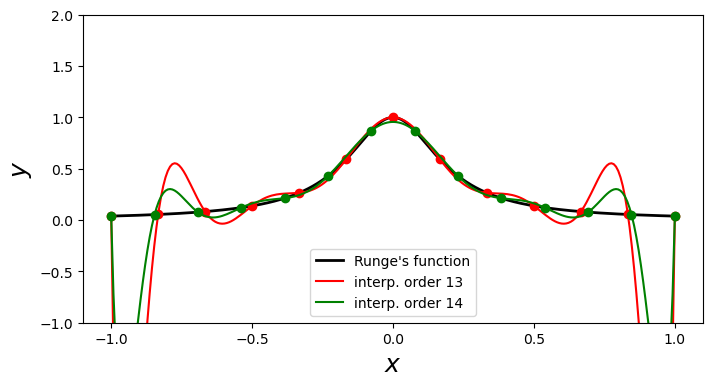

In [23]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def runge(x):
    return 1/(1 + 25 * x**2)
def runge_interpolate(n):
    x = np.linspace(-1,1,n)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p


xx = np.linspace(-1, 1, 250)
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")
# 13th order interpolation of the Runge function
n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d'%n)
# 14th order interpolation of the Runge function
n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d'%n)
ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)


**Scipy is better in fitting**

Text(0.5, 0, '$x$')

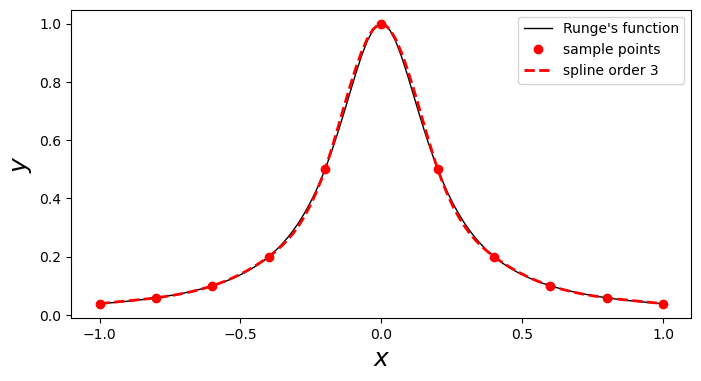

In [24]:
x = np.linspace(-1, 1, 11)
y = runge(x)
f_i = interpolate.interp1d(x, y, kind=3)

xx = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f_i(xx), 'r--', lw=2, label='spline order 3')
ax.legend()
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

# Sparse Matrices
- Arrays and matrices are Essential in scientific computation.  
Numpy ndarray is efficient but not with big sparse matrice
- Scipy offers a sparse module, which can handle better sparse matrices

## sparse module in `scipy`
- The main function to build a sparse matrix: `sparse.coo_matrix()`
- The two storage format for sparse matrices :
>`CSC` (Compressed Sparse Column) and `CSR` (Compressed Sparse Row) 

In [44]:
import scipy.sparse as sp
sparse_m = np.array([[0, 1, 0, 0], [0, 0, 0, 2], [0, 0, 3, 0], [5, 0, 0, 0]])
# Build sp sparse matrix and convert it to `csc`
A = sp.coo_matrix(sparse_m).tocsc()
b = np.ones(4)

In [45]:
x = sp.linalg.spsolve(A, b)

In [46]:
x2 = np.linalg.solve(A.todense(), b)
x2

array([0.2       , 1.        , 0.33333333, 0.5       ])

# Partial Differential Equations
>Solving PDES could demand too much resource compared to other types of computational  problems (ODE).  
Number of points required to discretize a region of space scale exponentially with  
the number of dimension (1D, 2D, 3D)  
An example heat transfert equation:  
>>∂u/∂t = α ∇²u

## PDEs – Finite Difference Methods
>Solve PDEs by approximating the derivatives in the PDE with finite differences.  
The basic idea is to represent the continuous domain of the PDE with a discrete grid of points.

>>Euler backward method:
>> $$\frac{d}{d x} u{\left(x_{n} \right)} = \frac{u{\left(x_{n} \right)} - u{\left(x_{n-1} \right)}}{x - x_{n-1}}$$


In [2]:
import sympy
# Eq(Derivative(u(xn), x),  ((u(xn) - u(xn1))/(x - xn1)))
print(sympy.latex(Eq(Derivative(u(xn), x),  ((u(xn) - u(xn1))/(x - xn1)))))
uxx = Symbol("u_xx")
uyy = Symbol("u_yy")
print(sympy.latex(Eq(uxx+uyy, 0)))


NameError: name 'Eq' is not defined

>Let's see an example  
An ODE problem $$u_{xx} = -5 ~~~~x\in[0,1] $$
$$u(x=0) = 1 , u(x=1) = 2.$$ 
>This problem can be formulated as $$ Au = b $$

### Importation of Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d

import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la

import dolfinx
import ufl

### Setting Equation

In [3]:
N = 5 # Number of points
u0, u1 = 1, 2 # bc
dx = 1.0/(N+1) # step
A = (np.eye(N, k=-1) - 2*np.eye(N) + np.eye(N, k=1)) / dx**2
A

array([[-72.,  36.,   0.,   0.,   0.],
       [ 36., -72.,  36.,   0.,   0.],
       [  0.,  36., -72.,  36.,   0.],
       [  0.,   0.,  36., -72.,  36.],
       [  0.,   0.,   0.,  36., -72.]])

In [4]:
b = -5*np.ones(N)
b[0] -= u0 / dx**2
b[N-1] -= u1 / dx**2
b

array([-41.,  -5.,  -5.,  -5., -77.])

### Solving Equation with scipy

In [5]:
u = la.solve(A, b)

### Visualization

Text(0, 0.5, '$u(x)$')

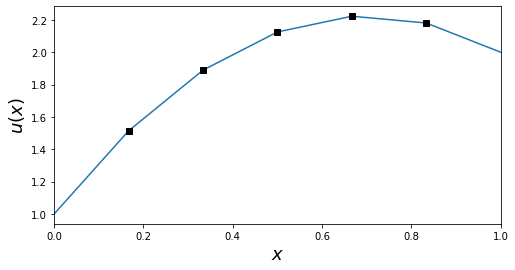

In [6]:
X = np.linspace(0, 1, N+2)
# U combines the boundary values and the interior points in one array
U = np.hstack([[u0], u, [u1]])
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X, U)
ax.plot(X[1:-1], u, 'ks')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)

## PDEs – Finite Element Methods

>FEM solve PDEs by approximating the solution of a PDE over a complex domain.  
The basic idea is to represent the domain of the PDE with a finite number of simple shapes (elements),  
and then to approximate the solution at each point within these elements using a set of basis functions.

Transition, as we have seen some relevant libraries. Let's try to solve our problem

# The project

Let's jump into details of my project

## The Algorithm
> In other word, what do we need, what are inputs and expected outputs?

## In Details 
<img src="images/fig_1.png" width="700" height="350" /> <img src="images/fig_2.png" width="700" height="350" />

<img src="images/fig_3.png" width="700" height="350" /> <img src="images/fig_4.png" width="700" height="350" />

## First approach with FDMs
A 2D problem where:  $$u_{xx} + u_{yy} = 0$$  
Boundary conditions 
$$u(x=0) = 3, u(x=1)=-1, u(y=0)=-5, u(y=1)=5$$

In [9]:
N = 100 # Number of points
# BC
u0_t, u0_b = 5, -5
u0_l, u0_r = 3, -1
dx = 1./(N+1) # step
# One dim formulation along x axis
# Euler backward second order derivative
A1_d = (sp.eye(N, k=-1) + sp.eye(N, k=1) - 4 *sp.eye(N)) / dx**2
A = sp.kron(sp.eye(N), A1_d) + (sp.eye(N**2, k=-N) + sp.eye(N**2, k=N)) / dx**2
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

- To construct the vector `b` from the boundary conditions, it is convenient to create a NxN  
array of nonzeros, and assign the boundary condition to edge element of this array.  
Then we can reshape this matrix to $$ N^{2}*1$$ vector that can be used in the Au = b

In [14]:
x = sympy.Symbol('x')
sympy.latex(x**2)

'x^{2}'

In [15]:
b = np.zeros((N, N))
b[0, :] += u0_b # bottom
b[-1, :] += u0_t # top
b[:, 0] += u0_l # left
b[:, -1] += u0_r # right
b = -b.reshape(N**2) / dx**2
b

array([ 20402.,  51005.,  51005., ..., -51005., -51005., -40804.])

### Solving Equation

In [16]:
v = sp.linalg.spsolve(A, b)
u = v.reshape(N, N)

### Visualization

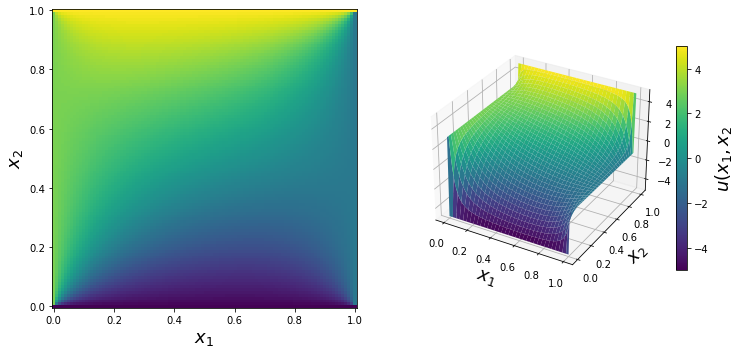

In [17]:
U = np.vstack([np.ones((1, N+2)) * u0_b,
                np.hstack([np.ones((N, 1)) * u0_l, u, np.ones((N, 1)) * u0_r]),
                np.ones((1, N+2))*u0_t])
x = np.linspace(0, 1, N+2)
X, Y = np.meshgrid(x, x)
fig = plt.figure(figsize=(12, 5.5))
cmap = mpl.cm.get_cmap('viridis')
ax = fig.add_subplot(1, 2, 1)
c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, U, vmin=-5, vmax=5, rstride=3, cstride=3,
                    linewidth=0, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"$u(x_1, x_2$", fontsize=18)

>Solution to the two dimensional heat equation with Dirichlet boundary conditions

>FDM methods result in matrices `A`  that are very sparse. Using sparse matrix can give significant performance improvement  

In [ ]:
# We can play to solve matrice A
A_dense = A.todense()
%timeit la.solve(A_dense, b)

# Sparse matrix
%timeit sp.linalg.spsolve(A,b)

## Solution using FEM methods with FeniCSx

To Solve a FEM problem, we perform next steps:
- Generate a Mesh for the problem domain
- Write the PDE on weak form
- Program the problem in the FEM framework
- Solve the resulting algebraic equations
- Post process and/or visulize the solution

FEniCS is a Python library for solving partial differential equations (PDEs) using the finite element method (FEM). It provides a high-level interface for creating, manipulating, and solving complex systems of PDEs, and it can be used for a wide range of applications, including fluid dynamics, solid mechanics, and electromagnetic problems. FEniCS is open-source software and can be freely used and modified by researchers and engineers

In [11]:
import sys
import gmsh
from dolfinx.io import XDMFFile, gmshio
from mpi4py import MPI
import dolfinx 

from ufl import (TestFunction, SpatialCoordinate, TrialFunction,
                as_vector, dx, grad, inner, system)
import numpy as np
from petsc4py import PETSc
import matplotlib.pyplot as plt

import pyvista
import matplotlib.pyplot as plt
import matplotlib as mpl


### Mesh generation with gmsh
> - Gmsh is a three-dimensional finite element mesh generator that can be used to create complex geometric models for use in numerical simulations  
> - Gmsh has a built-in CAD engine that can be used to create and edit geometric models, and it can also import models from other CAD 

In [2]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 0)
model = gmsh.model()
model.add("Rectangle")
model.setCurrent("Rectangle")
length = 10
height = 3
rectangle = model.occ.addRectangle(0,0,0,length,height)
model.occ.synchronize()
model.addPhysicalGroup(1, [1])
model.addPhysicalGroup(2, [rectangle])
ov = gmsh.model.getEntitiesInBoundingBox(0,0,0,length,height, 0)
gmsh.model.mesh.setSize(ov, 0.5)
model.mesh.generate(3)

### Export mesh to dolfinx format

In [3]:
domain, cell_markers, facet_markers = gmshio.model_to_mesh(model, MPI.COMM_SELF, 0)
domain.name = "Rectangle"
cell_markers.name = f"{domain.name}_cells"
facet_markers.name = f"{domain.name}_facets"

gmsh.finalize()

### Creation of two subdomains

In [4]:
def concrete(x):
    return x[0] >= length/2

def layer_1(x):
    return x[0] <= length/2
Q = dolfinx.fem.FunctionSpace(domain, ("DG", 0))
kappa =   dolfinx.fem.Function(Q)
cells_0 = dolfinx.mesh.locate_entities(domain, domain.topology.dim, concrete)
cells_1 = dolfinx.mesh.locate_entities(domain, domain.topology.dim, layer_1)

kappa.x.array[cells_0] = np.full_like(cells_0, 0.54, dtype=PETSc.ScalarType)
kappa.x.array[cells_1] = np.full_like(cells_1, 1, dtype=PETSc.ScalarType)

### PDE on weak form

In [5]:
V = dolfinx.fem.FunctionSpace(domain, ("Lagrange", 1))
u = TrialFunction(V)
v = TestFunction(V)
un  = dolfinx.fem.Function(V)
f = dolfinx.fem.Constant(domain, 0.0)
mu = dolfinx.fem.Constant(domain, 2.3)
dt = dolfinx.fem.Constant(domain, 0.05)

F = inner(u - un, v) * dx + dt * mu * inner(kappa*grad(u), grad(v)) * dx
F -= dt * inner(f,v) * dx
(a, L) =  system(F)

### Dirichlet Boundary Condtions

In [6]:
# This is for exanmple temperature input profile
def uD_function(t):
    return lambda x: x[0]*0 + 25

uD = dolfinx.fem.Function(V)
t = 0
uD.interpolate(uD_function(t))

# Boundaries
def dirichlet_facets(x):
    return np.isclose(x[0], length)

tdim = domain.topology.dim
bc_facets = dolfinx.mesh.locate_entities_boundary(domain, tdim - 1, dirichlet_facets)
bndry_dofs = dolfinx.fem.locate_dofs_topological(V, tdim - 1, bc_facets)
bcs = [dolfinx.fem.dirichletbc(uD, bndry_dofs)]

### Applying boundary conditions on LHS

In [8]:
compiled_a = dolfinx.fem.form(a)
A = dolfinx.fem.petsc.assemble_matrix(compiled_a, bcs=bcs)
A.assemble()

comipled_L = dolfinx.fem.form(L)
b = dolfinx.fem.Function(V)

### Solver for time dependant problem

>PETSc: Portable, Extensible Toolkit for Scientific Computation  
We create a  Krylov Subspace Method solver for the domain and set the type of solver to Conjugate Gradients.  
The preconditioner is set to HYPRE (High Performance Preconditioners)


In [9]:
# PETSc
solver = PETSc.KSP().create(domain.comm)
solver.setOperators(A)
solver.setType(PETSc.KSP.Type.CG)

pc =  solver.getPC()
pc.setType(PETSc.PC.Type.HYPRE)
pc.setHYPREType("boomeramg")

## Resolution and visualization

In [10]:
plotter_2 = pyvista.Plotter()
plotter_2.open_gif("u_time.gif")
topology_2, cells_2, geometry_2 = dolfinx.plot.create_vtk_mesh(V)
uh = dolfinx.fem.Function(V)
grid_2 = pyvista.UnstructuredGrid(topology_2, cells_2, geometry_2)
grid_2.point_data["T"] = uh.x.array
viridis  = plt.cm.get_cmap("viridis", 25)
sargs = dict(title_font_size=25, label_font_size=20, fmt="%.2e", color="white" ,
                position_x=0.1, position_y=0.8, width=0.8, height=0.1)

renderer = plotter_2.add_mesh(grid_2, show_edges=True, lighting=False,
                                cmap=viridis, scalar_bar_args=sargs, clim=[0, 30])
plotter_2.view_xy()
plotter_2.camera.zoom(1.3)

# Solving a time dependent problem
T = 20
while t < T:
    # Update boundary condition
    t += dt.value
    uD.interpolate(uD_function(t))

    # Assemble RHS
    b.x.array[:] = 0
    dolfinx.fem.petsc.assemble_vector(b.vector, comipled_L)

    # Apply boundary condition
    dolfinx.fem.petsc.apply_lifting(b.vector, [compiled_a], [bcs])
    b.x.scatter_reverse(dolfinx.la.ScatterMode.add)
    dolfinx.fem.petsc.set_bc(b.vector, bcs)

    # Solve linear problem
    sol_u = solver.solve(b.vector, uh.vector)
    uh.x.scatter_forward()

    # Update un
    un.x.array[:] = uh.x.array

    # Update plotter
    plotter_2.update_scalars(uh.x.array, render=False)
    plotter_2.write_frame()

plotter_2.close()

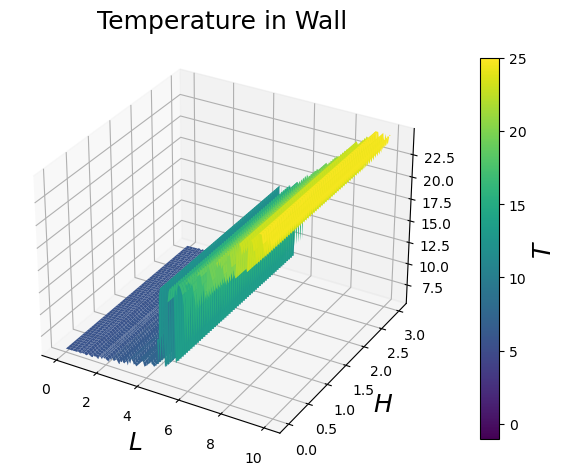

In [12]:

sol_u, _ = np.meshgrid(uh.x.array, b.x.array)
l = np.linspace(0, length, uh.x.array.shape[0])
h = np.linspace(0, height, uh.x.array.shape[0])

L, H = np.meshgrid(l, h)

fig = plt.figure(figsize=(12, 5.5))
cmap = mpl.cm.get_cmap('viridis')

ax = fig.add_subplot(1,1,1, projection='3d')
p = ax.plot_surface(L, H, sol_u, vmin=-1, vmax=25, rstride=3, cstride=3,
                    linewidth=0, cmap=cmap)
ax.set_xlabel(r"$L$", fontsize=18)
ax.set_ylabel(r"$H$", fontsize=18)
ax.set_title(r"Temperature in Wall", fontsize=18)
cb = plt.colorbar(p, ax=ax, shrink=0.9)
cb.set_label(r"$T$", fontsize=18)



<div align="center"><img src="T_time.gif" width="700" height="350" /> </div>

# Manage Python env with conda
- `conda env create --file conda_env.yaml`

# Thanks for listening
<br>

<div align="center"><img src="images/ThatsAllFolks.jpg" width="700" height="350" /> </div>